In [2]:
import numpy as np
import matplotlib.pyplot as plt

data_dna0 = np.loadtxt('dna_med_val_0.txt')
data_rpa0 = np.loadtxt('rpa_dna_A_med_val_0.txt')
data_dna_c0 = np.loadtxt('dna_c_med_val_0.txt')
data_dna_chst0 = np.loadtxt('dna_c_hst_med_val_0.txt')
data_dna_cst0 = np.loadtxt('dna_c_st_med_val_0.txt')
data_two_rpa_0 = np.loadtxt('two_rpa_dna_med_val_0.txt')

data_dna4 = np.loadtxt('dna_med_val_4.txt')
data_rpa4 = np.loadtxt('rpa_dna_A_med_val_4.txt')
data_dna_c4 = np.loadtxt('dna_c_med_val_4.txt')
data_dna_chst4 = np.loadtxt('dna_c_hst_med_val_4.txt')
data_dna_cst4 = np.loadtxt('dna_c_st_med_val_4.txt')
data_two_rpa_4 = np.loadtxt('two_rpa_dna_med_val_4.txt')


In [4]:
std_dna0 = np.loadtxt('dna_std_val_0.txt')
std_rpa0 = np.loadtxt('rpa_dna_A_std_val_0.txt')
std_dna_c0 = np.loadtxt('dna_c_std_val_0.txt')
std_dna_chst0 = np.loadtxt('dna_c_hst_std_val_0.txt')
std_dna_cst0 = np.loadtxt('dna_c_st_std_val_0.txt')
std_two_rpa_0 = np.loadtxt('two_rpa_dna_std_val_0.txt')

std_dna4 = np.loadtxt('dna_std_val_4.txt')
std_rpa4 = np.loadtxt('rpa_dna_A_std_val_4.txt')
std_dna_c4 = np.loadtxt('dna_c_std_val_4.txt')
std_dna_chst4 = np.loadtxt('dna_c_hst_std_val_4.txt')
std_dna_cst4 = np.loadtxt('dna_c_st_std_val_4.txt')
std_two_rpa_4 = np.loadtxt('two_rpa_dna_std_val_4.txt')

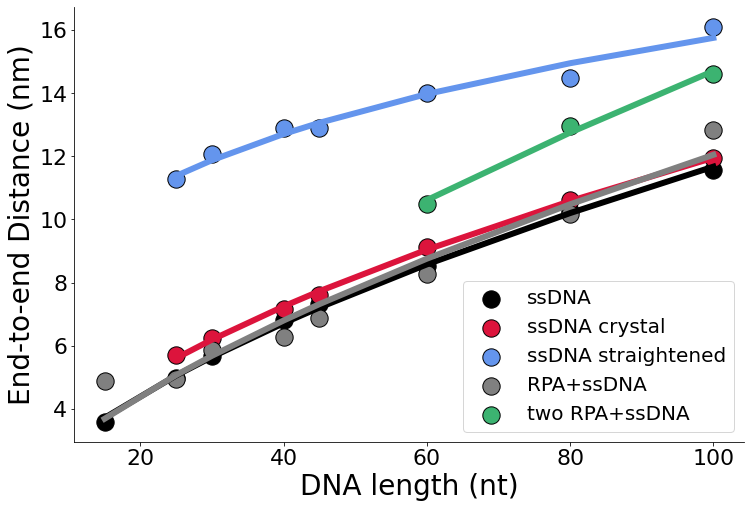

In [34]:

fig, axp = plt.subplots(figsize=(12, 8))
from scipy.optimize import curve_fit
def scaling_law(x, A, v):
    return A * x**v

length_m = [25, 30, 40, 45, 60, 80, 100]
length = [15, 25, 30, 40, 45, 60, 80, 100]
length_s = [60, 80, 100]

axp.scatter(length, data_dna4, label='ssDNA',
            color='black', s=300, edgecolor='black')
axp.scatter(length_m, data_dna_c4, label='ssDNA crystal',
            color='crimson', s=300, edgecolor='black')
axp.scatter(length_m, data_dna_cst4, label='ssDNA straightened',
            color='cornflowerblue', s=300, edgecolor='black')
axp.scatter(length, data_rpa4, label='RPA+ssDNA',
            color='gray', s=300, edgecolor='black')
axp.scatter(length_s, data_two_rpa_4, label='two RPA+ssDNA', color='mediumseagreen', edgecolor='black', s=300)


#axp.errorbar(length, data_dna4, yerr=std_dna4/2, capsize=14, fmt='o', color='black', linewidth=2)
#axp.errorbar(length_m, data_dna_c4, yerr=std_dna_c4[:4]/2, capsize=14, fmt='o',color='crimson', linewidth=2)
#axp.errorbar(length_m, data_dna_chst4[:4], yerr=std_dna_chst4[:4]/2, capsize=14, fmt='o',color='cornflowerblue', linewidth=2)
#axp.errorbar(length, data_rpa4, yerr=std_rpa4[:5]/2, capsize=14,color='gray', fmt= 'o', linewidth=2)

params_d, covar_d = curve_fit(scaling_law, length, data_dna4)
params_cd, covar_cd = curve_fit(scaling_law, length_m, data_dna_c4)
params_chstd, covar_chstd = curve_fit(scaling_law, length_m, data_dna_cst4)
params_r, covar_r = curve_fit(scaling_law, length, data_rpa4)
params_tr, covar_tr = curve_fit(scaling_law, length_s, data_two_rpa_4)

A_d, v_d = params_d
A_cd, v_cd = params_cd
A_chstd, v_chstd = params_chstd
A_r, v_r = params_r
A_tr, v_tr = params_tr

y_fit_d = scaling_law(length, A_d, v_d)
y_fit_cd = scaling_law(length_m, A_cd, v_cd)
y_fit_chstd = scaling_law(length_m, A_chstd, v_chstd)
y_fit_r = scaling_law(length, A_r, v_r)
y_fit_tr = scaling_law(length_s, A_tr, v_tr)

axp.plot(length, y_fit_d, color='black', linewidth=6)
axp.plot(length_m, y_fit_cd, color='crimson', linewidth=6)
axp.plot(length_m, y_fit_chstd, color='cornflowerblue', linewidth=6)
axp.plot(length, y_fit_r, color='gray',linewidth=6)
axp.plot(length_s, y_fit_tr, color='mediumseagreen', linewidth=6)

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('End-to-end Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
axp.legend(fontsize=20, loc='lower right')

fig.savefig('compare_distances.png', dpi=300, bbox_inches='tight')

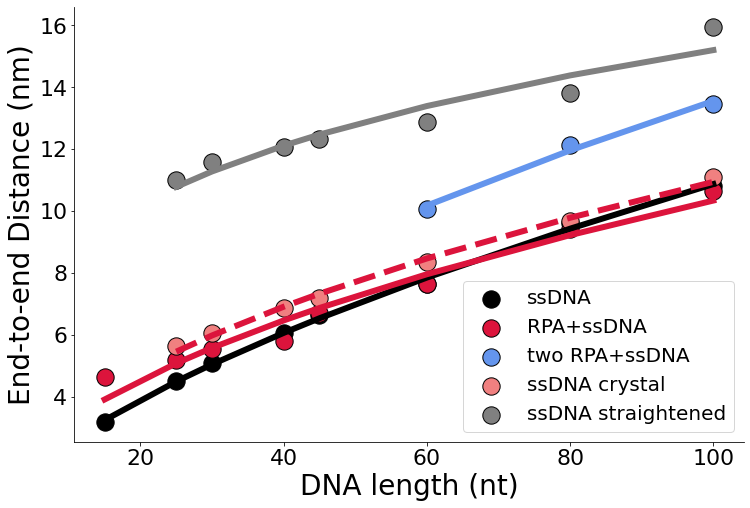

In [41]:

fig, axp = plt.subplots(figsize=(12, 8))
from scipy.optimize import curve_fit
def scaling_law(x, A, v):
    return A * x**v

length_m = [25, 30, 40, 45, 60, 80, 100]
length = [15, 25, 30, 40, 45, 60, 80, 100]
length_s = [60, 80, 100]

axp.scatter(length, data_dna0, label='ssDNA',
            color='black', s=300, edgecolor='black')
axp.scatter(length, data_rpa0, label='RPA+ssDNA',
            color='crimson', s=300, edgecolor='black')
axp.scatter(length_s, data_two_rpa_0, label='two RPA+ssDNA', color='cornflowerblue', edgecolor='black', s=300)
axp.scatter(length_m, data_dna_c0, label='ssDNA crystal',
            color='lightcoral', s=300, edgecolor='black')
axp.scatter(length_m, data_dna_cst0, label='ssDNA straightened',
            color='gray', s=300, edgecolor='black')
#axp.scatter(length, data_rpa0, label='RPA+ssDNA',
#            color='gray', s=300, edgecolor='black')
#axp.scatter(length_s, data_two_rpa_0, label='two RPA+ssDNA', color='mediumseagreen', edgecolor='black', s=300)


#axp.errorbar(length, data_dna4, yerr=std_dna4/2, capsize=14, fmt='o', color='black', linewidth=2)
#axp.errorbar(length_m, data_dna_c4, yerr=std_dna_c4[:4]/2, capsize=14, fmt='o',color='crimson', linewidth=2)
#axp.errorbar(length_m, data_dna_chst4[:4], yerr=std_dna_chst4[:4]/2, capsize=14, fmt='o',color='cornflowerblue', linewidth=2)
#axp.errorbar(length, data_rpa4, yerr=std_rpa4[:5]/2, capsize=14,color='gray', fmt= 'o', linewidth=2)

params_d, covar_d = curve_fit(scaling_law, length, data_dna0)
params_cd, covar_cd = curve_fit(scaling_law, length_m, data_dna_c0)
params_chstd, covar_chstd = curve_fit(scaling_law, length_m, data_dna_cst0)
params_r, covar_r = curve_fit(scaling_law, length, data_rpa0)
params_tr, covar_tr = curve_fit(scaling_law, length_s, data_two_rpa_0)

A_d, v_d = params_d
A_cd, v_cd = params_cd
A_chstd, v_chstd = params_chstd
A_r, v_r = params_r
A_tr, v_tr = params_tr

y_fit_d = scaling_law(length, A_d, v_d)
y_fit_cd = scaling_law(length_m, A_cd, v_cd)
y_fit_chstd = scaling_law(length_m, A_chstd, v_chstd)
y_fit_r = scaling_law(length, A_r, v_r)
y_fit_tr = scaling_law(length_s, A_tr, v_tr)

axp.plot(length, y_fit_d, color='black', linewidth=6)
axp.plot(length_m, y_fit_cd, color='crimson', linewidth=6, linestyle='dashed')
axp.plot(length_m, y_fit_chstd, color='gray', linewidth=6)
axp.plot(length, y_fit_r, color='crimson',linewidth=6)
axp.plot(length_s, y_fit_tr, color='cornflowerblue', linewidth=6)

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('End-to-end Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
axp.legend(fontsize=20, loc='lower right')

fig.savefig('compare_distances0.png', dpi=300, bbox_inches='tight')

In [47]:
def scaling_law(x, A, v):
    return 0.625 * x**v
params_d0, covar_d0 = curve_fit(scaling_law, length, data_dna0)
params_d4, covar_d4 = curve_fit(scaling_law, length, data_dna4)

A_d0, v_d0 = params_d0
A_d4, v_d4 = params_d4

print(A_d0, v_d0, A_d4, v_d4)

1.0 0.6184765403558238 1.0 0.6389935791434161


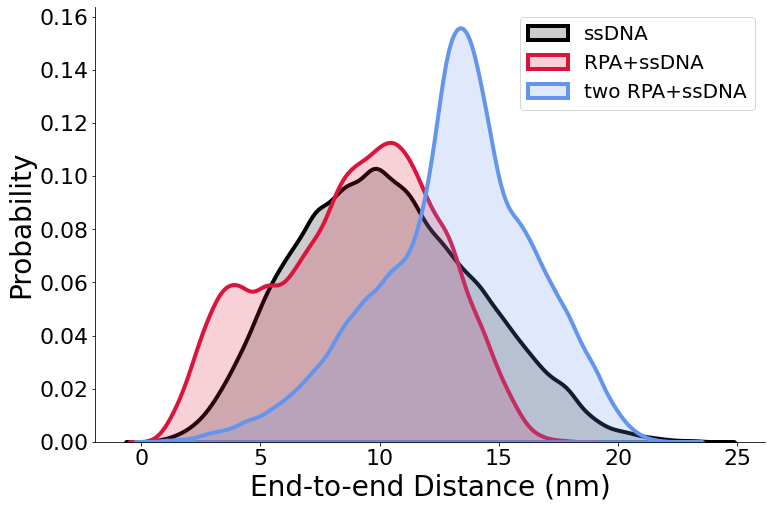

In [43]:
folder='/trajectories/gargi/RPA_Ed/RESULTS.ANALYSIS/'
import seaborn as sns
names = ['end_to_end_80_dih_0.4.txt', 'end_to_end_RPA_80_dih_0.4.txt', 'end_to_end_two_rpa_combined_80_0.4.txt']
leg = ['ssDNA', 'RPA+ssDNA', 'two RPA+ssDNA']

color = ['black', 'crimson', 'cornflowerblue']

fig, axp = plt.subplots(figsize=(12,8))

count = 0
for item in names:
 file=folder+item
 data = np.loadtxt(file)
 dt = data/10
 sns.kdeplot(dt, ax=axp, fill=True, alpha=0.2, linewidth=4, color=color[count], label=leg[count])
 count = count + 1
 

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('Probability', fontsize=28)
axp.set_xlabel('End-to-end Distance (nm)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
axp.legend(fontsize=20, loc='upper right') 
fig.savefig('distance-distribution.png', dpi=300, bbox_inches='tight')

In [34]:
def scaling_lawa(x, v):
    return 0.65 * x**v

params_d, covar_d = curve_fit(scaling_lawa, length, data_dna4[:5])
params_cd, covar_cd = curve_fit(scaling_lawa, length_m, data_dna_c4[:4])
params_chstd, covar_chstd = curve_fit(scaling_lawa, length_m, data_dna_chst4[:4])
params_r, covar_r = curve_fit(scaling_lawa, length, data_rpa4[:5])



print(params_d)
print(params_cd)
print(params_chstd)
print(params_r)

[0.63599669]
[0.65424281]
[0.73007375]
[0.63110613]


In [49]:
print(data_rpa0, std_dna0)

[ 4.631  5.199  5.529  5.809  6.698  7.632  9.418 10.648] [0.978 1.453 1.661 2.036 2.165 2.651 3.414 4.045]


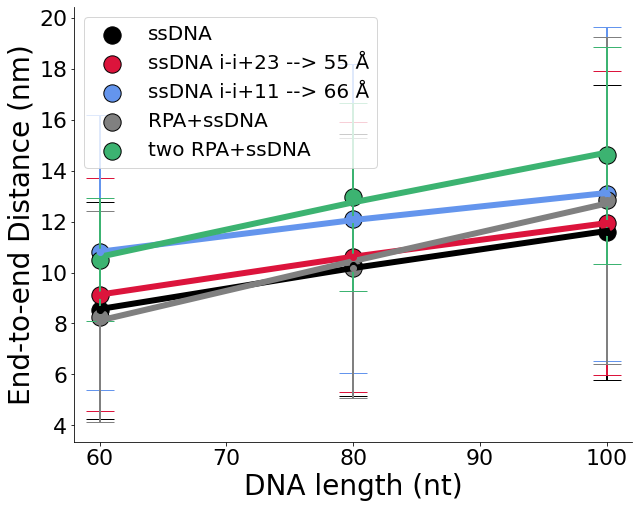

In [28]:

from scipy.optimize import curve_fit
fig, axp = plt.subplots(figsize=(10, 8))


def scaling_law(x, A, v):
    return A * x**v


length_m = [60, 80, 100]
length = [60, 80, 100]

axp.scatter(length, data_dna4[-3:], label='ssDNA',
            color='black', s=300, edgecolor='black')
axp.scatter(length_m, data_dna_c4[-3:], label='ssDNA i-i+23 --> 55 \u212B',
            color='crimson', s=300, edgecolor='black')
axp.scatter(length_m, data_dna_chst4[-3:], label='ssDNA i-i+11 --> 66 \u212B',
            color='cornflowerblue', s=300, edgecolor='black')
axp.scatter(length, data_rpa4[-3:], label='RPA+ssDNA',
            color='gray', s=300, edgecolor='black')
axp.scatter(length, data_two_rpa_4, label='two RPA+ssDNA',
            color='mediumseagreen', s=300, edgecolor='black')


axp.errorbar(length, data_dna4[-3:], yerr=std_dna4[-3:]/2,
             capsize=14, fmt='o', color='black', linewidth=2)
axp.errorbar(length_m, data_dna_c4[-3:], yerr=std_dna_c4[-3:]/2,
             capsize=14, fmt='o', color='crimson', linewidth=2)
axp.errorbar(length_m, data_dna_chst4[-3:], yerr=std_dna_chst4[-3:]/2,
             capsize=14, fmt='o', color='cornflowerblue', linewidth=2)
axp.errorbar(length, data_rpa4[-3:], yerr=std_rpa4[-3:]/2,
             capsize=14, color='gray', fmt='o', linewidth=2)
axp.errorbar(length, data_two_rpa_4, yerr=std_two_rpa_4/2,
             capsize=14, color='mediumseagreen', fmt='o', linewidth=2)

params_d, covar_d = curve_fit(scaling_law, length, data_dna4[-3:])
params_cd, covar_cd = curve_fit(scaling_law, length_m, data_dna_c4[-3:])
params_chstd, covar_chstd = curve_fit(
    scaling_law, length_m, data_dna_chst4[-3:])
params_r, covar_r = curve_fit(scaling_law, length, data_rpa4[-3:])
params_tr, covar_tr = curve_fit(scaling_law, length, data_two_rpa_4)

A_d, v_d = params_d
A_cd, v_cd = params_cd
A_chstd, v_chstd = params_chstd
A_r, v_r = params_r
A_tr, v_tr = params_tr

y_fit_d = scaling_law(length, A_d, v_d)
y_fit_cd = scaling_law(length_m, A_cd, v_cd)
y_fit_chstd = scaling_law(length_m, A_chstd, v_chstd)
y_fit_r = scaling_law(length, A_r, v_r)
y_fit_tr = scaling_law(length, A_tr, v_tr)

axp.plot(length, y_fit_d, color='black', linewidth=6)
axp.plot(length_m, y_fit_cd, color='crimson', linewidth=6)
axp.plot(length_m, y_fit_chstd, color='cornflowerblue', linewidth=6)
axp.plot(length, y_fit_r, color='gray', linewidth=6)
axp.plot(length, y_fit_tr, color='mediumseagreen', linewidth=6)

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('End-to-end Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)

axp.legend(fontsize=20, loc='upper left')

fig.savefig('compare_distances_60_100.png', dpi=300, bbox_inches='tight')
